In [58]:
import numpy as np
from scipy.stats import poisson
from scipy.stats import norm
from scipy import fftpack
import math
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Result of the Z Value:  3.4661629670697414


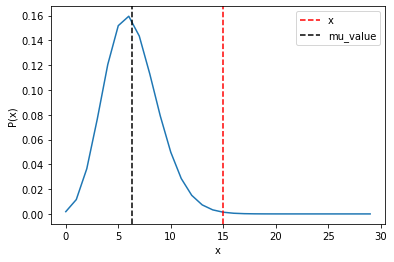

Comment: Probability that in a single year are observed 15 or more hurricanes: 0.222%


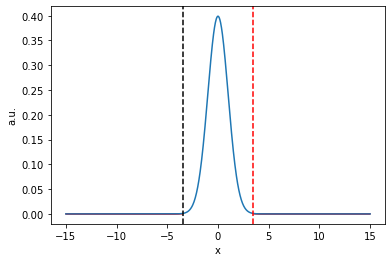

p-value = 0.00053
Comment: 15 is NOT a statiscally significant number


In [59]:
mu_value =  6.3
sigma_value = np.sqrt(mu_value)
x_bar = 15
z = abs(x_bar - mu_value) / sigma_value
print("Result of the Z Value: ", z)

# plot pmf
k = np.arange(30)
y = stats.poisson.pmf(k, mu_value)
plt.plot(k, y)
plt.axvline(x_bar, linestyle='--', color='r', label=r'x')
plt.axvline(mu_value, linestyle='--', color='k', label='mu_value')
plt.ylabel("P(x)")
plt.xlabel("x")
plt.legend()
plt.show()

Probabiliy_more_than_15 = (1. - np.sum(stats.poisson.pmf(np.arange(15), mu_value)))*100
print("Comment: Probability that in a single year are observed 15 or more hurricanes: {:.3f}%".format(Probabiliy_more_than_15))


x_s = np.linspace(-15, +15, 1000)
t_s = stats.norm.pdf(x_s)
plt.plot(x_s, t_s)
plt.fill_between(x_s, t_s, where=np.abs(x_s) > np.abs(z), color='r')
plt.axvline(z, linestyle='--', color='r')
plt.axvline(-z, linestyle='--', color='k')
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()

min_limit_value = stats.norm.cdf(-3) + (1. - stats.norm.cdf(3))
p_value = stats.norm.cdf(-z) + (1. - stats.norm.cdf(z))
print("p-value = {:.5f}".format(p_value))
print("Comment: {} is a statiscally significant number".format(x_bar) if p_value >= min_limit_value else "Comment: {} is NOT a statiscally significant number".format(x_bar))

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [60]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

#Defining lenth of array
n= len(post)

#Finding sigma values
pre_sigma = np.sqrt(np.var(pre, ddof=1))
post_sigma = np.sqrt(np.var(post, ddof=1))

#Taking geometric square of sigma values
sigma = math.sqrt((pre_sigma**2+post_sigma**2)/2)

#Defining x values that to be used to calculate Y
x_1 = np.mean(pre)
x_2 = np.mean(post)

#Calculationg T value
T = (x_1-x_2)/(sigma*math.sqrt(2/n))

print("Result of T: ",T)

p_value = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))

print("pvalue: ", p_value)
print("We can't accept the null hypothesis because the p-value is <𝛼/2 and it results that the change in the blood pressure is significant ")


Result of T:  -3.786997938137629
pvalue:  0.004302464132864604
We can't accept the null hypothesis because the p-value is <𝛼/2 and it results that the change in the blood pressure is significant 


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

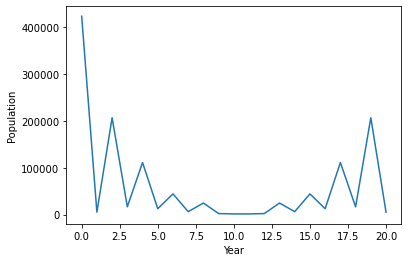

Reuslt of the Period:  10.5 years


In [61]:
data = np.loadtxt('/Users/h-a-k/Lab9/populations.txt')
years, hares, lynxes, _ = data.T

sig_fft = fftpack.fft(lynxes)
power = np.abs(sig_fft)
sample_freq = fftpack.fftfreq(len(lynxes))

#Defining Periodocity
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
powes = power[pos_mask]

# find the max of frequency of the array
peak_frequency = freqs[powes.argmax()]

period = 1/peak_frequency
plt.ylabel("Population")
plt.xlabel("Year")


plt.plot(abs(sig_fft))
plt.show()
print("Reuslt of the Period: ", period, "years")

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

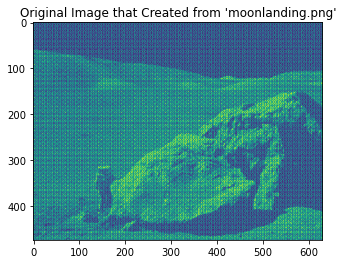

In [62]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy import fftpack

#Import the image as a 2D numpy array using plt.imread("moonlanding.png"). Examine the image with plt.imshow(), which is heavily contaminated with periodic noise.

image = plt.imread("moonlanding.png")
plt.imshow(image)
plt.title("Original Image that Created from 'moonlanding.png'")
plt.show()



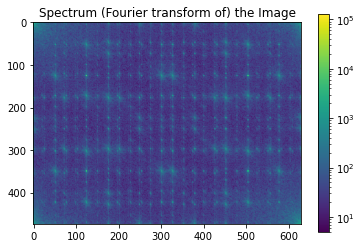

In [46]:
#Check the documentation of the scipy.fftpack package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. Hint: use LogNorm to plot the colors in log scal

image_fft = fftpack.fft2(image)
plt.imshow(np.abs(image_fft), norm=LogNorm(vmin=5))
plt.title('Spectrum (Fourier transform of) the Image')
plt.colorbar()
keep_fraction = 0.08



Text(0.5, 1.0, 'Result of Inspecting the spectrum and finding Filtered Spectrum')

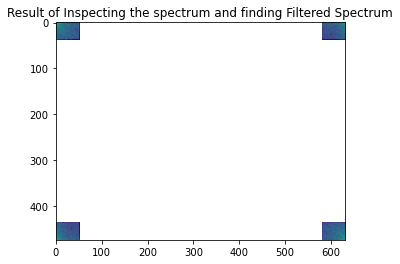

In [63]:
#Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
image_fft2 = image_fft.copy()
r_val, c_val = image_fft2.shape
image_fft2[int(r_val*keep_fraction):int(r_val*(1-keep_fraction))] = 0
image_fft2[:, int(c_val*keep_fraction):int(c_val*(1-keep_fraction))] = 0
plt.show()
plt.imshow(np.abs(img_fft2), norm=LogNorm(vmin=5))
plt.title('Result of Inspecting the spectrum and finding Filtered Spectrum')


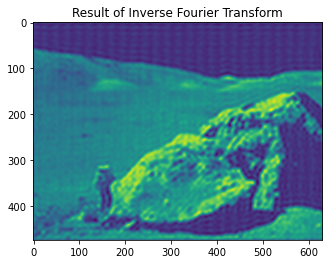

In [55]:
#Apply the inverse Fourier transform to plot the resulting image.
image_new = fftpack.ifft2(image_fft2).real
plt.show()
plt.title('Result of Inverse Fourier Transform')
plt.imshow(image_new)
plt.show()